<a href="https://colab.research.google.com/github/Bijay2305/Predictions/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

train_data= pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Training_data.xls")
train_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,Spices,Non-alcoholic beverages,"Prepared meals, snacks, sweets etc.",Food and beverages,"Pan, tobacco and intoxicants",Clothing,Footwear,Clothing and footwear,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,1,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,106.1,106.8,103.1,104.8,106.7,105.5,105.1,106.5,105.8,106.4,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,2,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,105.8,105.1,101.8,105.1,107.9,105.9,105.2,105.9,105.0,105.8,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,3,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,106.0,106.2,102.7,104.9,107.3,105.6,105.1,106.3,105.5,106.2,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,4,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,105.9,105.7,103.1,105.1,107.7,106.3,105.6,107.1,106.3,107.0,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,5,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,104.1,103.8,102.3,106.0,109.0,107.2,106.0,106.6,105.5,106.4,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7


In [ ]:
#lets see the inside data and understand it 
print(train_data.shape)
print(train_data.info())

(148, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   148 non-null    int64  
 1   Sector                               148 non-null    object 
 2   Year                                 148 non-null    int64  
 3   Month                                148 non-null    object 
 4   Cereals and products                 148 non-null    float64
 5   Meat and fish                        148 non-null    float64
 6   Egg                                  148 non-null    float64
 7   Milk and products                    148 non-null    float64
 8   Oils and fats                        148 non-null    float64
 9   Fruits                               148 non-null    float64
 10  Vegetables                           148 non-null    float64
 11  Pulses and products   

In [ ]:
#check the null value or missing value in any feature
print(train_data.isnull().sum()/100)


ID                                     0.0
Sector                                 0.0
Year                                   0.0
Month                                  0.0
Cereals and products                   0.0
Meat and fish                          0.0
Egg                                    0.0
Milk and products                      0.0
Oils and fats                          0.0
Fruits                                 0.0
Vegetables                             0.0
Pulses and products                    0.0
Sugar and Confectionery                0.0
Spices                                 0.0
Non-alcoholic beverages                0.0
Prepared meals, snacks, sweets etc.    0.0
Food and beverages                     0.0
Pan, tobacco and intoxicants           0.0
Clothing                               0.0
Footwear                               0.0
Clothing and footwear                  0.0
Housing                                0.5
Fuel and light                         0.0
Household g

In [ ]:
#for Housing there are some NAN value lets check % of it ,it is always suggest to impute value if dont have sufficient data 
print (train_data["Housing"].isnull().sum()/100)
print("Max of Housing value",train_data["Housing"].max())
print("Min of Housing value",train_data["Housing"].min())
print("Median of Housing value",train_data["Housing"].median())
print("Mean of Housing value",train_data["Housing"].mean())
#lets impute the value with the mean of it 
medianValue=train_data["Housing"].median()
train_data['Housing'] = train_data['Housing'].fillna(medianValue)


0.5
Max of Housing value 129.6
Min of Housing value 100.3
Median of Housing value 117.3
Mean of Housing value 116.99183673469386


In [ ]:
#Now lets the drop the coloums which are not needed for the predcitions 
train_data=train_data.drop(columns=['ID','Sector','Year','Month'])
#print(train_data.info())
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Cereals and products                 148 non-null    float64
 1   Meat and fish                        148 non-null    float64
 2   Egg                                  148 non-null    float64
 3   Milk and products                    148 non-null    float64
 4   Oils and fats                        148 non-null    float64
 5   Fruits                               148 non-null    float64
 6   Vegetables                           148 non-null    float64
 7   Pulses and products                  148 non-null    float64
 8   Sugar and Confectionery              148 non-null    float64
 9   Spices                               148 non-null    float64
 10  Non-alcoholic beverages              148 non-null    float64
 11  Prepared meals, snacks, sweets e

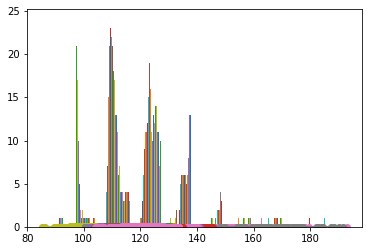

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
fit = stats.norm.pdf(train_data, np.mean(train_data), np.std(train_data))  #this is a fitting indeed

plt.plot(train_data,fit,'-o')

plt.hist(train_data)       #use this to draw histogram of your data

plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


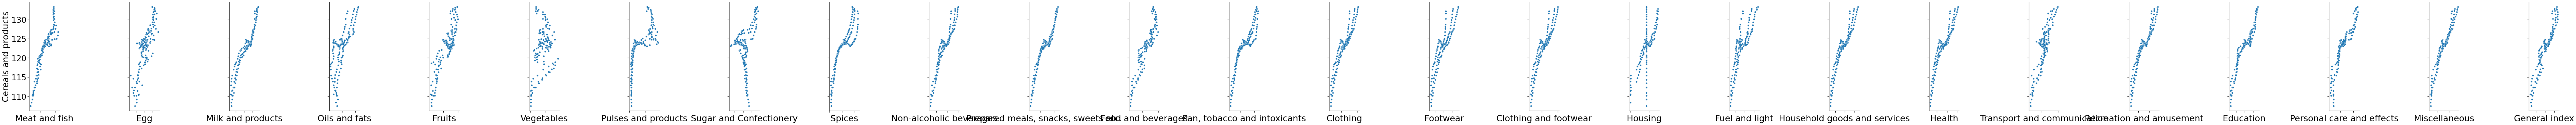

In [ ]:
import seaborn as sns
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(train_data, x_vars=['Meat and fish','Egg','Milk and products','Oils and fats','Fruits','Vegetables', 'Pulses and products', 'Sugar and Confectionery','Spices','Non-alcoholic beverages','Prepared meals, snacks, sweets etc.','Food and beverages','Pan, tobacco and intoxicants', 'Clothing','Footwear','Clothing and footwear','Housing','Fuel and light','Household goods and services', 'Health', 'Transport and communication','Recreation and amusement','Education','Personal care and effects','Miscellaneous', 'General index'], 
                     y_vars='Cereals and products',height=7, aspect=0.7, kind='scatter')
g.set(xticklabels=[]);

# 3.Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

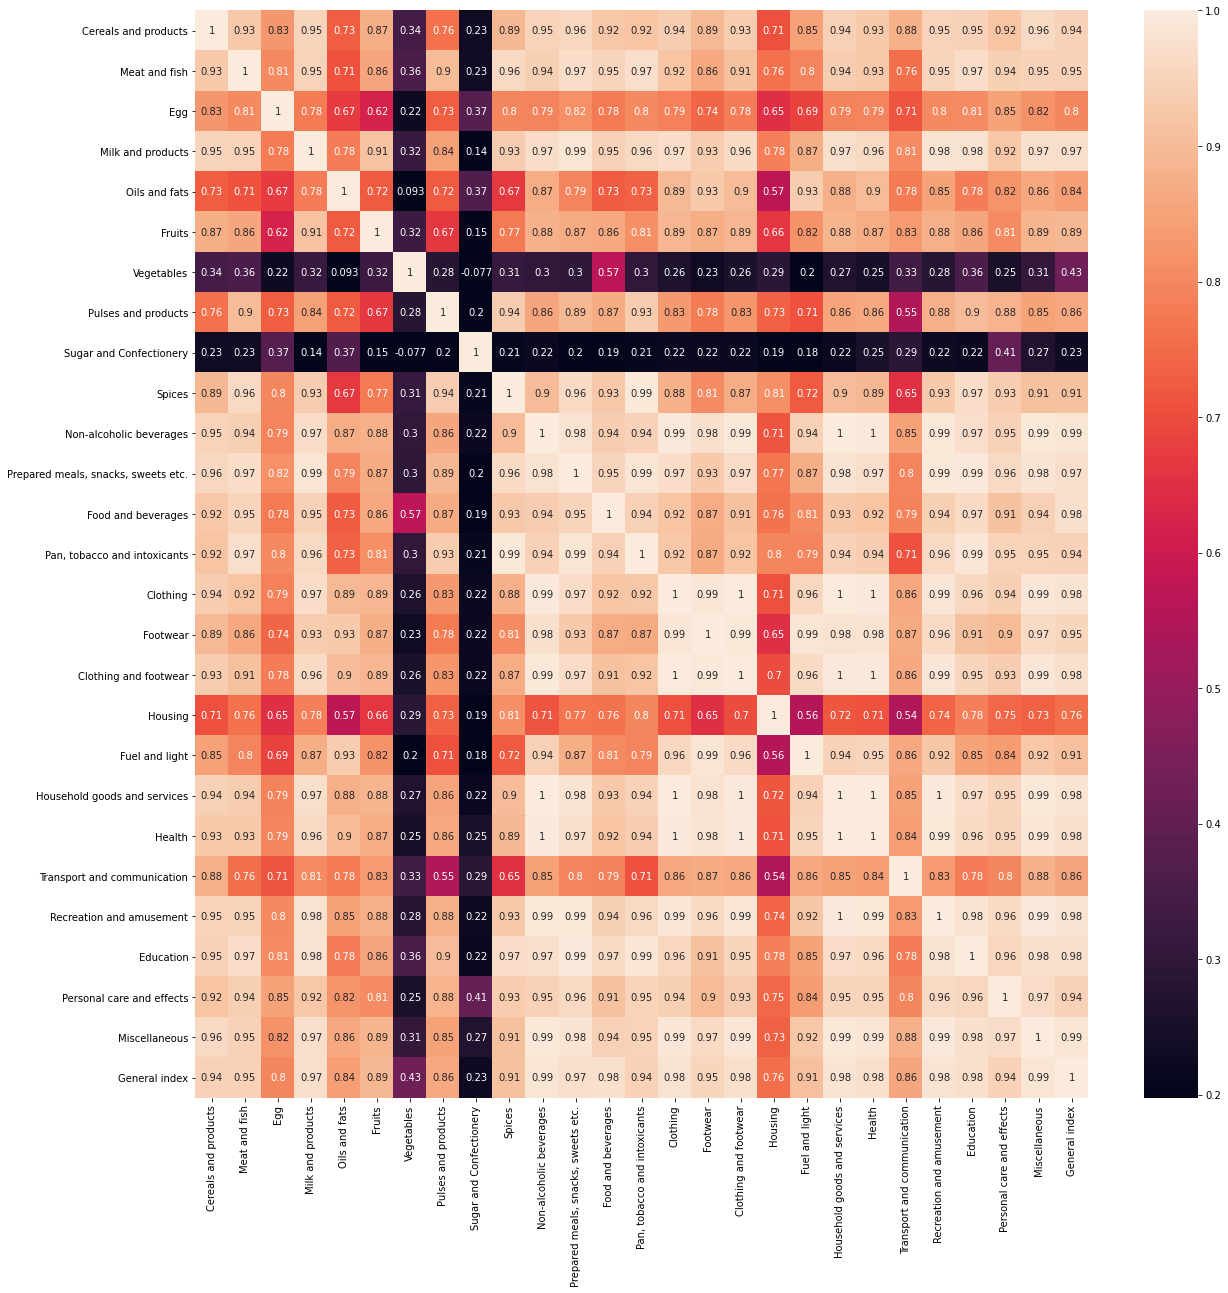

In [ ]:
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,robust= True)#,cmap="RdYlGn")

In [ ]:
X=train_data.drop(columns=['Cereals and products'])
y= train_data['Cereals and products']

type(X.columns)

pandas.core.indexes.base.Index

In [ ]:

X.skew()
#skewValue = X.skew(axis=1)
#skewValue
info=pd.DataFrame(X.skew(),columns=['skewness'])
info

,skewness
Meat and fish,-0.095012
Egg,0.025778
Milk and products,-0.475486
Oils and fats,0.504283
Fruits,-0.570949
Vegetables,0.050238
Pulses and products,0.509453
Sugar and Confectionery,0.113861
Spices,0.122292
Non-alcoholic beverages,-0.032717


In [ ]:

kurti=pd.DataFrame(X.kurt(),columns=['kurtosis'])
#info=info.assign((pd.DataFrame(X.kurt(),columns=['kurtosis'])))
kurti

,kurtosis
Meat and fish,-0.958697
Egg,-0.636841
Milk and products,-1.040040
Oils and fats,-0.657794
Fruits,-0.926565
Vegetables,-0.600298
Pulses and products,-1.394337
Sugar and Confectionery,-0.170270
Spices,-1.224527
Non-alcoholic beverages,-0.844379


### LinearRegression

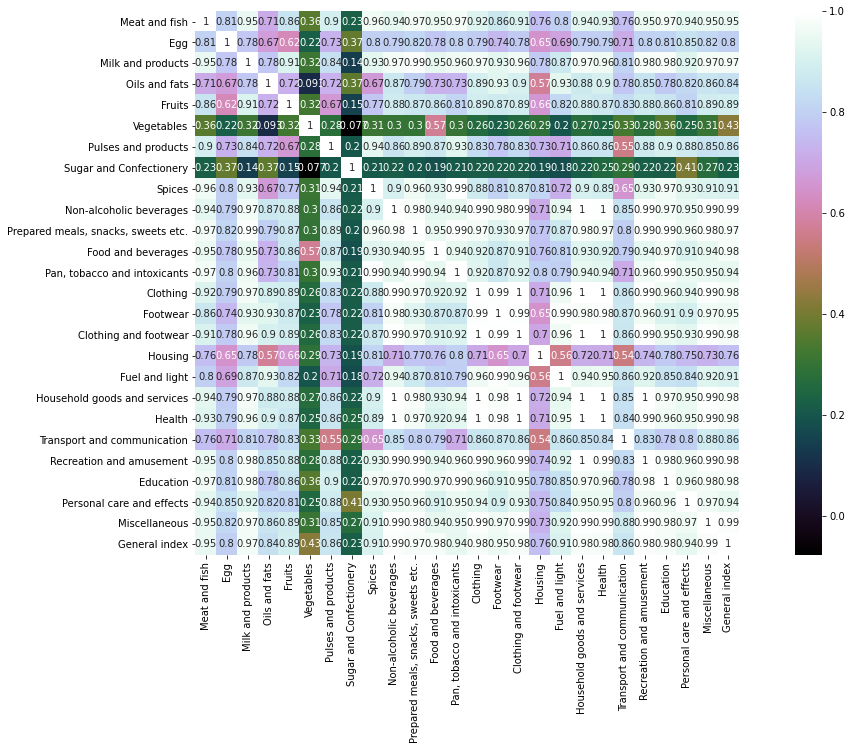

In [ ]:

#X=train_data.drop(columns=['Cereals and products'])
#y= train_data['Cereals and products']
corr_mat=X.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

### The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

— A value closer to 1 implies stronger positive correlation

— A value closer to -1 implies stronger negative correlation



In [ ]:
print(X.corr(method='pearson').head())
print(X[['Meat and fish','Egg']].corr(method='pearson'))

                   Meat and fish       Egg  ...  Miscellaneous  General index
Meat and fish           1.000000  0.805702  ...       0.946373       0.946035
Egg                     0.805702  1.000000  ...       0.819246       0.796794
Milk and products       0.947476  0.779581  ...       0.972056       0.972285
Oils and fats           0.711325  0.672860  ...       0.859483       0.843244
Fruits                  0.855865  0.620866  ...       0.885873       0.890812

[5 rows x 26 columns]
               Meat and fish       Egg
Meat and fish       1.000000  0.805702
Egg                 0.805702  1.000000


In [ ]:
#corr() Method
#standard correlation coefficient
#print(X.corr(method='kendall').head()) # Kendall Tau correlation coefficient
#print(X.corr(method='spearman').head()) # Kendall Tau correlation coefficient
#print(X.corr(method='callable').head()) # Kendall Tau correlation coefficient

#Correlation with output variable
cor_target= abs(y)
relevant_features = X[cor_target<.8]
relevant_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Meat and fish                        0 non-null      float64
 1   Egg                                  0 non-null      float64
 2   Milk and products                    0 non-null      float64
 3   Oils and fats                        0 non-null      float64
 4   Fruits                               0 non-null      float64
 5   Vegetables                           0 non-null      float64
 6   Pulses and products                  0 non-null      float64
 7   Sugar and Confectionery              0 non-null      float64
 8   Spices                               0 non-null      float64
 9   Non-alcoholic beverages              0 non-null      float64
 10  Prepared meals, snacks, sweets etc.  0 non-null      float64
 11  Food and beverages                   0 non-n

Text(0, 0.5, 'Cumulative explained variance')

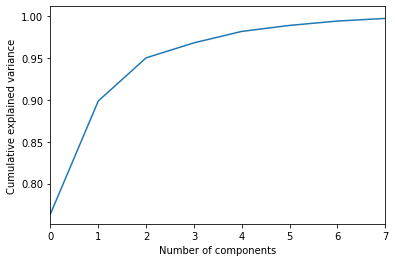

In [ ]:

from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')



In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)
lr= LinearRegression()
lr.fit(X_train,y_train)
print(lr.intercept_)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


-26.369479943674534
Mean_Squared_Error : 0.12649260725413833
r_square_value : 0.9956778241184021


In [ ]:
coeff = pd.DataFrame(X_train.columns)
coeff['CoefficientInLR'] = pd.Series(lr.coef_)
print(coeff)


                                      0  CoefficientInLR
0                         Meat and fish        -0.287082
1                                   Egg         0.026499
2                     Milk and products        -0.500949
3                         Oils and fats        -0.223899
4                                Fruits        -0.157972
5                            Vegetables        -0.311620
6                   Pulses and products        -0.164737
7               Sugar and Confectionery        -0.074564
8                                Spices         0.081862
9               Non-alcoholic beverages         0.606594
10  Prepared meals, snacks, sweets etc.        -0.098686
11                   Food and beverages         2.964662
12         Pan, tobacco and intoxicants        -0.248464
13                             Clothing         0.098865
14                             Footwear         0.192393
15                Clothing and footwear        -0.294902
16                             

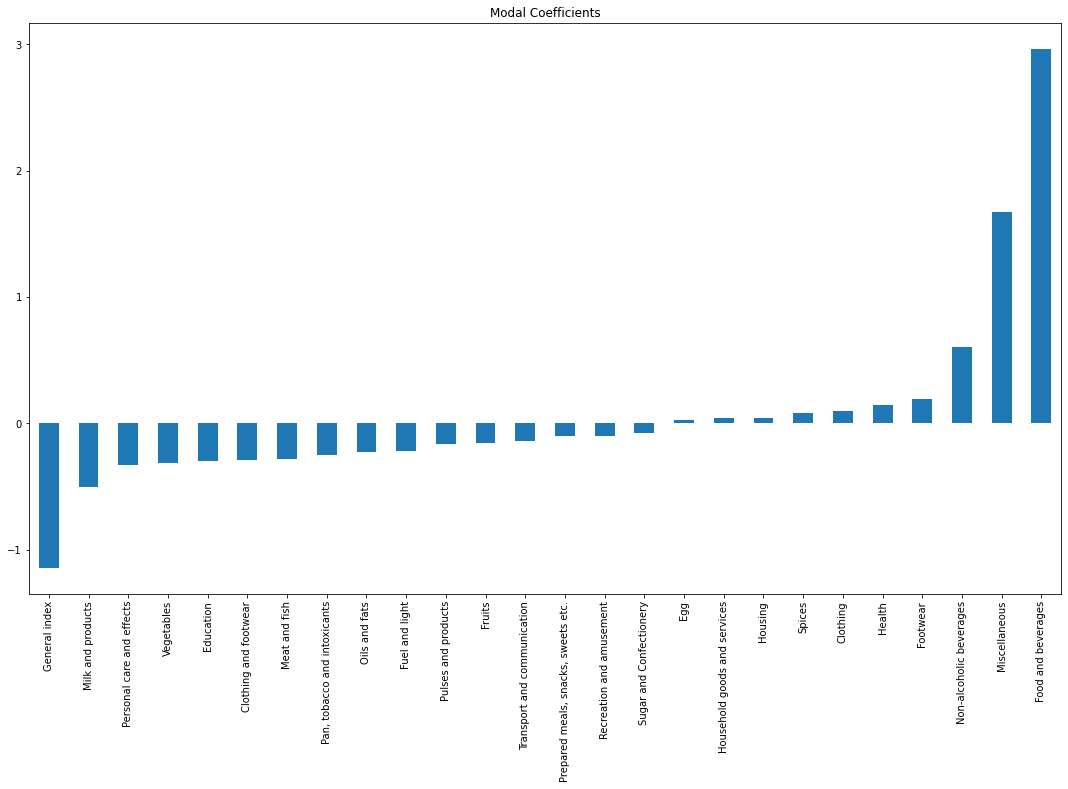

In [ ]:
predictors = X_train.columns
coef = pd.Series(lr.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=70)

### Ridge Regression 
To reduce  the co-efficient in the model prediction without doing the feature elimination.

Note : R-Square has been increased. Note that value of alpha, which is hyperparameter of Ridge, which means that they are not automatically learned by the model instead they have to be set manually.
Here we have consider alpha = 0.05. But let us consider different values of alpha and plot the coefficients for each case and match the case.
cost function for ridge regression.
 ![image.png](attachment:image.png)
Here if you notice, we come across an extra term, which is known as the penalty term. λ given here, is actually denoted by alpha parameter in the ridge function. So by changing the values of alpha, we are basically controlling the penalty term. Higher the values of alpha, bigger is the penalty and therefore the magnitude of coefficients are reduced.


Important Points:

•	It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.

•	It reduces the model complexity by coefficient shrinkage.

•	It uses L2 regularization technique. 



In [ ]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=.5, normalize=True)
#ridgeReg= LinearRegression()
ridgeReg.fit(X_train,y_train)
print(ridgeReg.intercept_)
y_pred = ridgeReg.predict(X_test)
#print(y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


26.658182906663356
Mean_Squared_Error : 1.5872045808294641
r_square_value : 0.9457661794839921


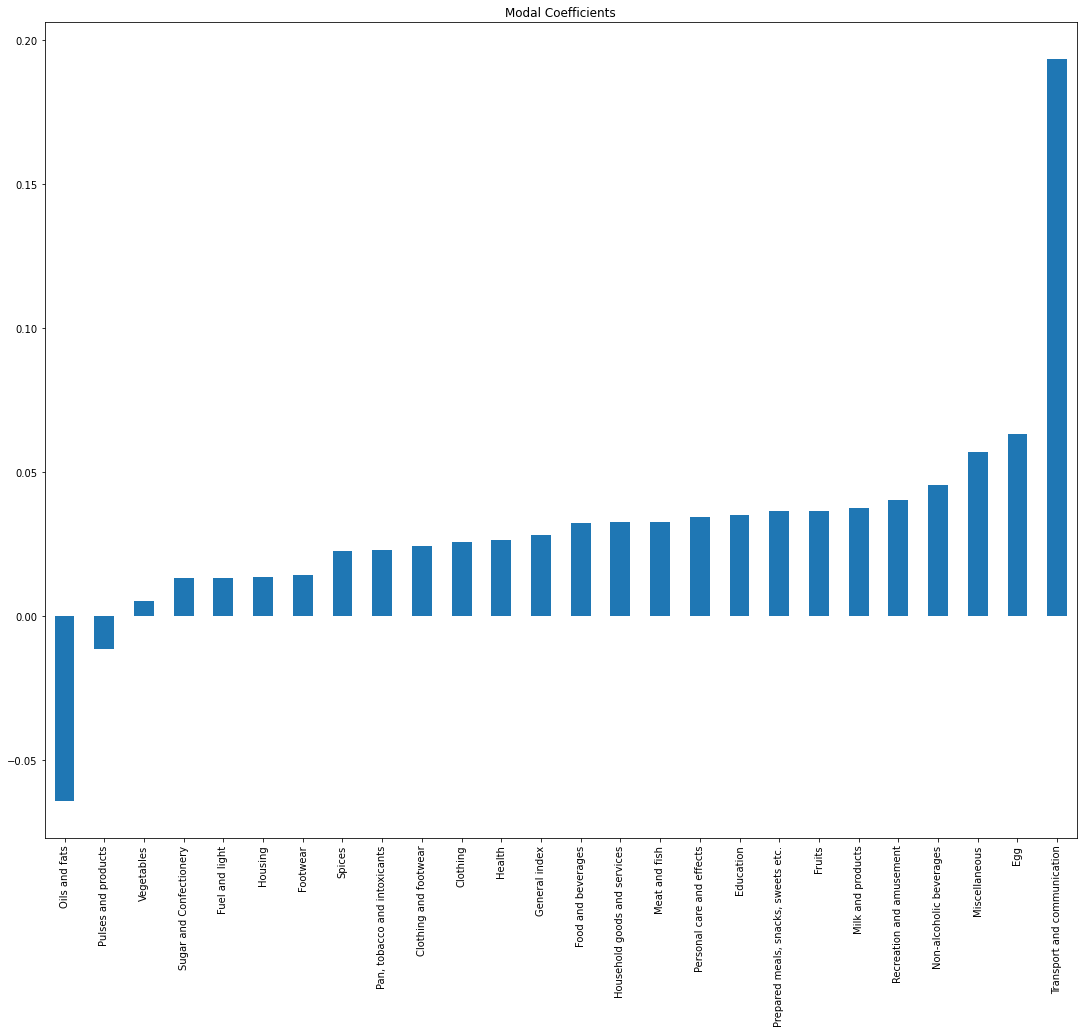

In [ ]:
predictors = X_train.columns
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')
fig = plt.gcf()
fig.set_size_inches(18.5, 15)
fig.savefig('test2png.png', dpi=70)


### lasso Regression
LASSO (Least Absolute Shrinkage Selector Operator), is quite similar to ridge

Note : we increased the value of alpha, coefficients were approaching towards zero, but if you see in case of lasso, even at smaller alpha’s, our coefficients are reducing to absolute zeroes. Therefore, lasso selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.
Mathematics behind lasso regression is quiet similar to that of ridge only difference being instead of adding squares of theta, we will add absolute value of Θ.

![image.png](attachment:image.png)
 
Important Points:

•	It uses L1 regularization technique 

•	It is generally used when we have more number of features, because it automatically does feature selection.


### Difference between Lasso and Redge Regression ?
When we have large datasets and there are 1000 features as independent variables and are co-related to dependent feature.

ridge regression to it, it will retain all of the features but will shrink the coefficients. But the problem is that model will still remain complex as there are 10,000 features, thus may lead to poor model performance.	

lasso regression is when we have correlated variables, it retains only one variable and sets other correlated variables to zero. That will possibly lead to some loss of information resulting in lower accuracy in our model.


77.24278300289542
Best alpha using built-in LassoCV:0.300000
Best alpha using built-in LassoCV:0.651061
Lasso picked 3 variables and eliminated the other 23 variables
Mean_Squared_Error : 9.772157435797984
r_square_value : 0.6660912910481431


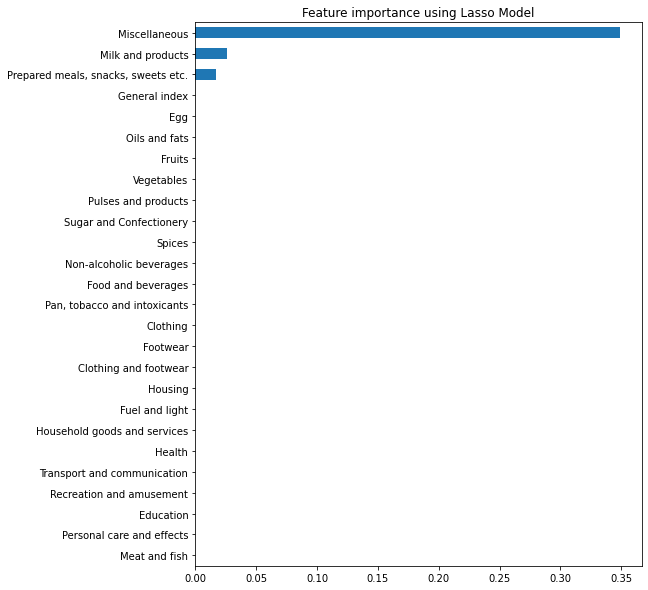

In [ ]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X_train,y_train)
print(lassoReg.intercept_)
print('Best alpha using built-in LassoCV:%f' % lassoReg.alpha)
print('Best alpha using built-in LassoCV:%f' % lassoReg.score(X,y))
y_pred = lassoReg.predict(X_test)
coef = pd.Series(lassoReg.coef_, index = X.columns)
#print(coef)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#print(y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


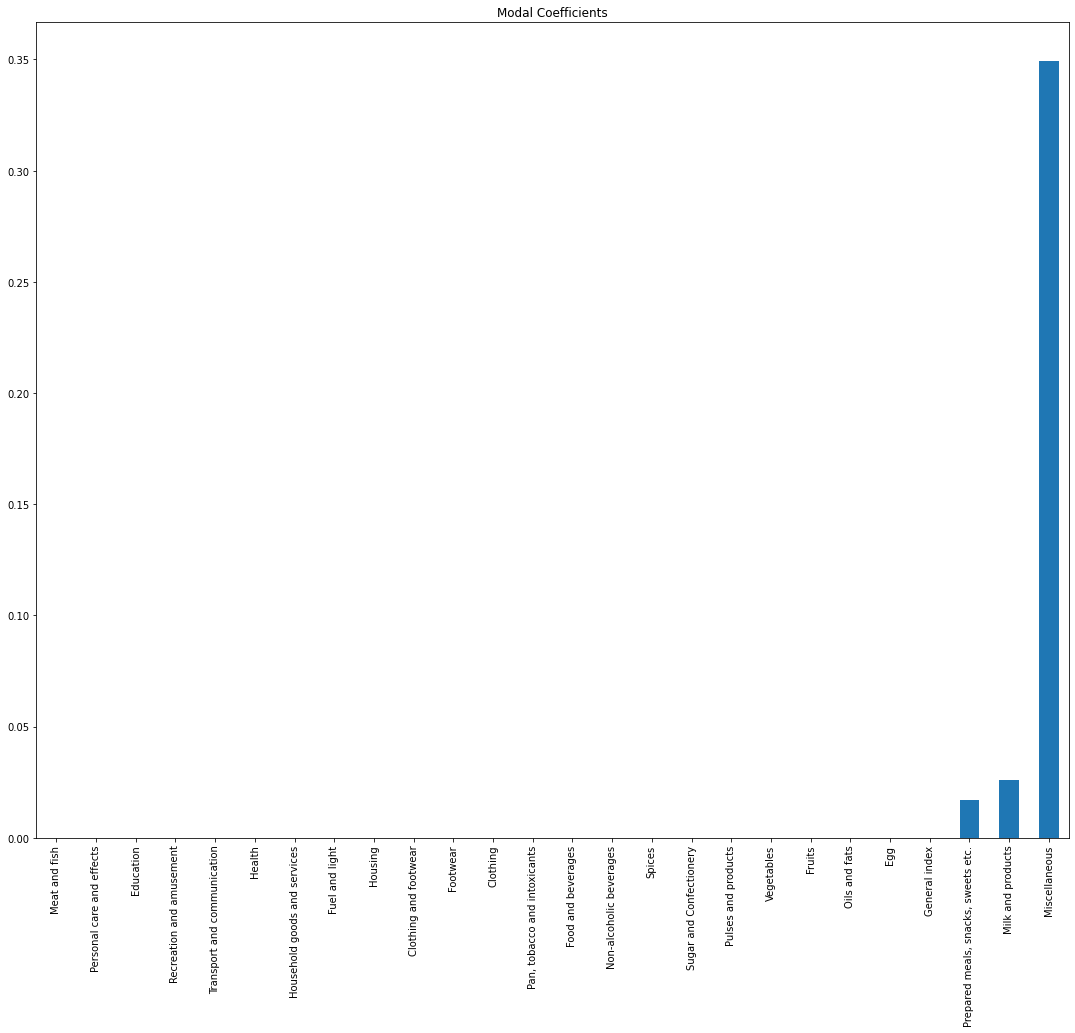

In [ ]:
predictors = X_train.columns
coef = pd.Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')
fig = plt.gcf()
fig.set_size_inches(18.5, 15)
fig.savefig('test2png.png', dpi=70)

### ElasticNet
   elastic net regression, which is basically a hybrid of ridge and lasso regression.
   
 Note: 
Elastic regression generally works well when we have a big dataset.
Elastic net is basically a combination of both L1 and L2 regularization. So if you know elastic net, you can implement both Ridge and Lasso by tuning the parameters. So it uses both L1 and L2 penality term, therefore its equation look like as follows:

![image.png](attachment:image.png)
 
How it works?

we have a bunch of correlated independent variables in a dataset, then elastic net will simply form a group consisting of these correlated variables. Now if any one of the variable of this group is a strong predictor (meaning having a strong relationship with dependent variable), then we will include the entire group in the model building, because omitting other variables (like what we did in lasso) might result in losing some information in terms of interpretation ability, leading to a poor model performance.

we need to define alpha and l1_ratio while defining the model. Alpha and l1_ratio are the parameters which you can set accordingly if you wish to control the L1 and L2 penalty separately. Actually, we have
Alpha = a + b           and     l1_ratio =  a / (a+b)

where, a and b weights assigned to L1 and L2 term respectively. So when we change the values of alpha and l1_ratio, a and b are set aaccordingly such that they control trade off between L1 and L2 as:

a * (L1 term) + b* (L2 term)
Let alpha (or a+b) = 1, and now consider the following cases:

•	If l1_ratio =1, therefore if we look at the formula of l1_ratio, we can see that l1_ratio can only be equal to 1 if a=1, which implies b=0. Therefore, it will be a lasso penalty.

•	Similarly if l1_ratio = 0, implies a=0. Then the penalty will be a ridge penalty.

•	For l1_ratio between 0 and 1, the penalty is the combination of ridge and lasso.


In [ ]:
from sklearn.linear_model import ElasticNet
EltcNet = ElasticNet(alpha=0.3, normalize=True)
EltcNet.fit(X_train,y_train)
print(EltcNet.intercept_)
y_pred = EltcNet.predict(X_test)
#print(y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

85.86758813694058
Mean_Squared_Error : 11.11618221852686
r_square_value : 0.6201667771474262


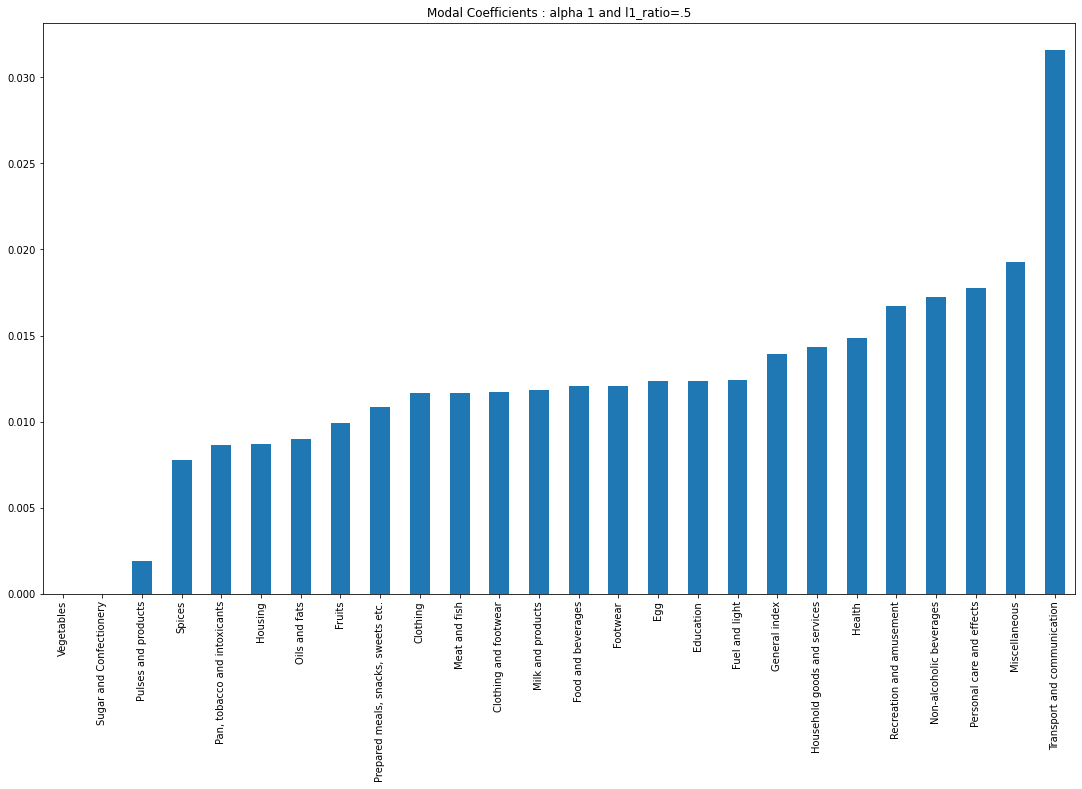

In [ ]:
predictors = X.columns
coef = pd.Series(EltcNet.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients : alpha 1 and l1_ratio=.5')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=70)

# 5:Feature Selection Using RFE
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and
building a model on those attributes that remain. It uses the model accuracy to identify which
attributes (and combination of attributes) contribute the most to predicting the target attribute.


In [ ]:
import statsmodels.api as sm
X_train_sm = X_train
X_train_sm=sm.add_constant(X_train_sm)
lm_1 = sm.OLS(y_train,X_train_sm).fit()
lm_1.params
print(lm_1.summary())

                             OLS Regression Results                             
Dep. Variable:     Cereals and products   R-squared:                       0.997
Model:                              OLS   Adj. R-squared:                  0.996
Method:                   Least Squares   F-statistic:                     952.4
Date:                  Wed, 14 Jul 2021   Prob (F-statistic):           3.35e-85
Time:                          05:08:35   Log-Likelihood:                -28.378
No. Observations:                   103   AIC:                             110.8
Df Residuals:                        76   BIC:                             181.9
Df Model:                            26                                         
Covariance Type:              nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

### What Statistical Rules to look for?
    The Statistics R squared, adjusted R squared, predicted R squared, Mallow’s Cp and s (Square root of MSE) can be used to compare the results and these statistics are generated by the best subset procedure.

    Usually, one would go with the subsets that provide the largest r-squared value. However, R-squared value tends to increase with the size of the subset. Example, the best 5 predictor model will always have better results compared to a 4 predictor model. Therefore, it is recommended to use R-squared value when looking or comparing a similar size model.
    
    Use adjusted R squared with Mallow’s Cp to compare models with different number of predictors. Selecting a model with a higher adjusted R squared is as good as choosing a model with the smallest mean square of the error (MSE).
    
    Mallow’s Cp, the smallest this statistic the better the results, this means if the Mallow’s Cp value is approximately equal to the number of parameters in the model it is considered as precise or has small variance in estimating the regression coefficients and predicting the response. It is observed that models that lack fit have larger Mallow’s Cp value than the number of parameters.
    
•	RSQ Adj: The higher the better

•	Mallows Cp:  The Lower the better

•	Mean Squared Error (S): The Lower the better


#### residual
In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e).

Adjusted R-square

R2 is that if new predictors (X) are added to our model, R2 only increases or remains constant but it never decreases. We can not judge that by increasing complexity of our model, are we making it more accurate?
The Adjusted R-Square is the modified form of R-Square that has been adjusted for the number of predictors in the model. It incorporates model’s degree of freedom. The adjusted R-Square only increases if the new term improves the model accuracy.

AdjR2(R square)
![image.png](attachment:image.png)

Where
R2 = Sample R square
p = Number of predictors
N = total sample size



In [ ]:
rfe = RFE(lr, 10)
rfe = rfe.fit(X, y)
#print(rfe.support_)
#print(rfe.ranking_)
#print(fit.n_features_)
support_ = pd.DataFrame(rfe.support_)
ranking_= pd.DataFrame(rfe.ranking_)
features_cols=pd.DataFrame(X.columns)
ranktable =pd.concat([features_cols,support_,ranking_],axis=1)
ranktable.columns=['Features','support_','rank']
#print(ranktable)
print(ranktable.loc[ranktable['rank']==1])
#df.loc[df['column_name'] == some_value]
print(ranktable.info())

                       Features  support_  rank
0                 Meat and fish      True     1
3                 Oils and fats      True     1
5                    Vegetables      True     1
9       Non-alcoholic beverages      True     1
11           Food and beverages      True     1
20  Transport and communication      True     1
22                    Education      True     1
23    Personal care and effects      True     1
24                Miscellaneous      True     1
25                General index      True     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Features  26 non-null     object
 1   support_  26 non-null     bool  
 2   rank      26 non-null     int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 570.0+ bytes
None


In [ ]:
f = rfe.get_support(1) #the most important features
XX = X[X.columns[f]]   # final features`
print(XX.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Meat and fish                148 non-null    float64
 1   Oils and fats                148 non-null    float64
 2   Vegetables                   148 non-null    float64
 3   Non-alcoholic beverages      148 non-null    float64
 4   Food and beverages           148 non-null    float64
 5   Transport and communication  148 non-null    float64
 6   Education                    148 non-null    float64
 7   Personal care and effects    148 non-null    float64
 8   Miscellaneous                148 non-null    float64
 9   General index                148 non-null    float64
dtypes: float64(10)
memory usage: 11.7 KB
None


In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(XX, y, train_size=0.7 , random_state=100)

lr.fit(X_train_new,y_train_new)

print(lr.intercept_)
y_predict =lr.predict(X_test_new)
mse = mean_squared_error(y_test_new, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)




-16.554152879194007
Mean_Squared_Error : 11.11618221852686
r_square_value : 0.6201667771474262


In [ ]:
ridgeReg.fit(X_train_new,y_train_new)
print(ridgeReg.intercept_)
y_predict_ridgeReg =ridgeReg.predict(X_test_new)
mse_ridgeReg = mean_squared_error(y_test_new, y_pred)
r_squared_ridgeReg = r2_score(y_test, y_pred)
print('Mean_Squared_Error Ridge  :' ,mse_ridgeReg)
print('r_square_value Ridge:',mse_ridgeReg)

20.543476482494256
Mean_Squared_Error Ridge  : 11.11618221852686
r_square_value Ridge: 11.11618221852686


In [ ]:
lassoReg.fit(X_train_new,y_train_new)
print(lassoReg.intercept_)
y_predict_lassoReg =lassoReg.predict(X_test_new)
mse_lassoReg = mean_squared_error(y_test_new, y_pred)
r_squared_lassoReg = r2_score(y_test, y_pred)
print('Mean_Squared_Error Lasso  :' ,mse_lassoReg)
print('r_square_value Lasso:',r_squared_lassoReg)

74.5323481751709
Mean_Squared_Error Lasso  : 11.11618221852686
r_square_value Lasso: 0.6201667771474262


In [ ]:
EltcNet.fit(X_train_new,y_train_new)
print(EltcNet.intercept_)
y_predict_EltcNet =EltcNet.predict(X_test_new)
mse_EltcNet = mean_squared_error(y_test_new, y_pred)
r_squared_EltcNet = r2_score(y_test, y_pred)
print('Mean_Squared_Error EltcNet  :' ,mse_lassoReg)
print('r_square_value EltcNet:',r_squared_lassoReg)

96.78833341443845
Mean_Squared_Error EltcNet  : 11.11618221852686
r_square_value EltcNet: 0.6201667771474262


Text(0, 0.5, 'Cereals and products')

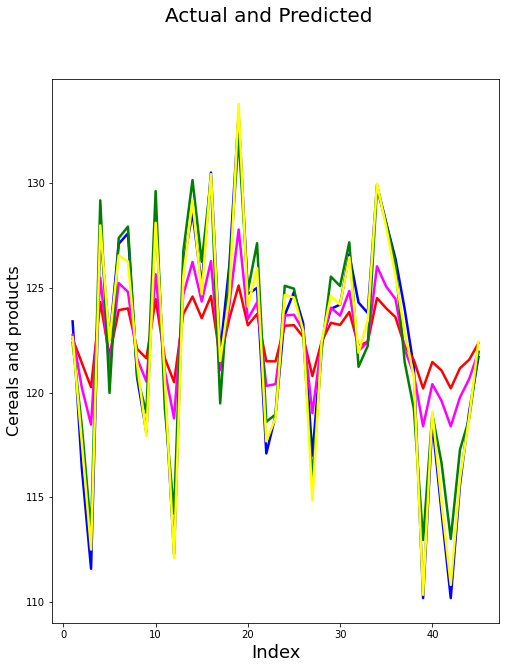

In [ ]:
#Actual vs Predicted
c = [i for i in range(1,46,1)]
fig = plt.figure()
plt.plot(c,y_test_new, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_predict_EltcNet, color="red",  linewidth=2.5, linestyle="-")
plt.plot(c,y_predict_lassoReg, color="magenta",  linewidth=2.5, linestyle="-")
plt.plot(c,y_predict_ridgeReg, color="green",  linewidth=2.5, linestyle="-")
plt.plot(c,y_predict, color="yellow",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Cereals and products', fontsize=16)  

In [ ]:
value_compare = pd.DataFrame({'Actual': y_test_new, 
                              'y_predict_EltcNet': y_predict_EltcNet,
                              'y_predict_lassoReg':y_predict_lassoReg,
                              'y_predict_ridgeReg':y_predict_ridgeReg,
                             'y_predict':y_predict})
###value_compare = pd.DataFrame({'Actual': y_test_new.flatten(), 'y_predict_EltcNet': y_predict_lassoReg.flatten(),
                              ###'y_predict_ridgeReg':y_predict_ridgeReg.flatten(),
                             ###'y_predict':y_predict.flatten()})
value_compare



,Actual,y_predict_EltcNet,y_predict_lassoReg,y_predict_ridgeReg,y_predict
75,123.4,122.570078,122.753820,122.387479,122.641805
26,116.4,121.418251,120.237917,118.391258,117.611676
11,111.6,120.259959,118.476785,113.393399,112.515764
125,127.7,124.320005,125.479382,129.173688,127.977337
46,122.5,121.746881,121.244278,119.988702,122.486828
111,127.1,123.938036,125.227791,127.375822,126.551100
130,127.6,124.019780,124.808474,127.921312,126.255066
51,120.7,122.082899,121.621664,120.759106,121.363684
32,118.1,121.638258,120.531439,119.042582,117.926459
128,128.5,124.465371,125.647108,129.615661,128.103531


In [ ]:
coefficients= pd.DataFrame({'EltcNet':EltcNet.coef_,
                            'ridgeReg':ridgeReg.coef_,
                           'lassoReg':lassoReg.coef_,
                            'lr':lr.coef_
                                 },XX.columns)
coefficients

,EltcNet,ridgeReg,lassoReg,lr
Meat and fish,0.017654,0.072035,0.000000,-0.283025
Oils and fats,0.017994,-0.022057,0.000000,-0.402056
Vegetables,0.000396,0.002574,0.000000,-0.093687
Non-alcoholic beverages,0.026332,0.104271,0.000000,1.128132
Food and beverages,0.018102,0.067613,0.000000,0.869292
Transport and communication,0.045459,0.286811,0.000000,1.168199
Education,0.018666,0.078136,0.000000,0.259123
Personal care and effects,0.027435,0.095521,0.000000,0.266203
Miscellaneous,0.028972,0.120778,0.419317,-1.043925
General index,0.021134,0.072692,0.000000,-0.657398


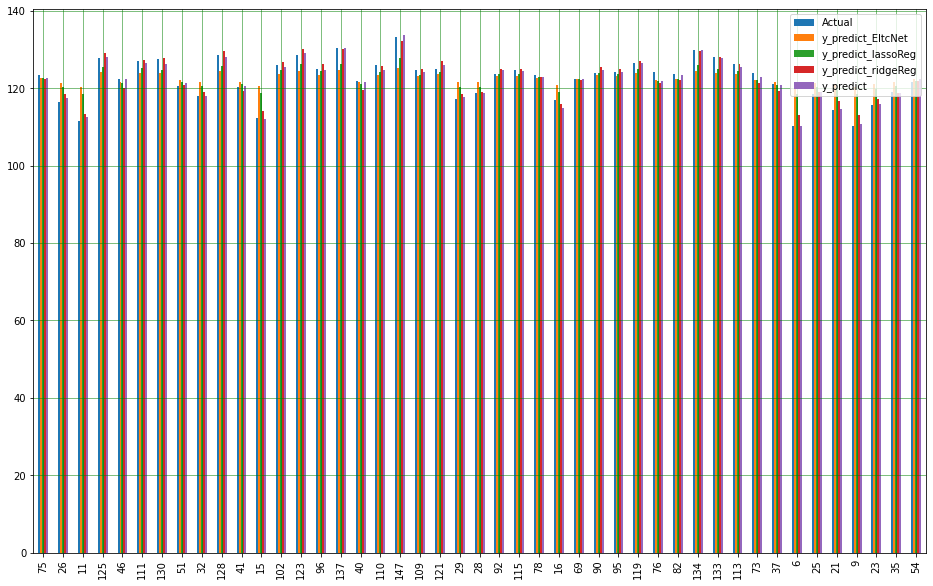

In [ ]:

value_compare.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()